#**Imports**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import string
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet', '/root/nltk_data/')
!unzip /root/nltk_data/corpora/wordnet.zip -d /root/nltk_data/corpora/
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data/...


Archive:  /root/nltk_data/corpora/wordnet.zip
   creating: /root/nltk_data/corpora/wordnet/
  inflating: /root/nltk_data/corpora/wordnet/lexnames  
  inflating: /root/nltk_data/corpora/wordnet/data.verb  
  inflating: /root/nltk_data/corpora/wordnet/index.adv  
  inflating: /root/nltk_data/corpora/wordnet/adv.exc  
  inflating: /root/nltk_data/corpora/wordnet/index.verb  
  inflating: /root/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /root/nltk_data/corpora/wordnet/data.adj  
  inflating: /root/nltk_data/corpora/wordnet/index.adj  
  inflating: /root/nltk_data/corpora/wordnet/LICENSE  
  inflating: /root/nltk_data/corpora/wordnet/citation.bib  
  inflating: /root/nltk_data/corpora/wordnet/noun.exc  
  inflating: /root/nltk_data/corpora/wordnet/verb.exc  
  inflating: /root/nltk_data/corpora/wordnet/README  
  inflating: /root/nltk_data/corpora/wordnet/index.sense  
  inflating: /root/nltk_data/corpora/wordnet/data.noun  
  inflating: /root/nltk_data/corpora/wordnet/data.adv  


In [82]:
df = pd.read_csv("sentiment_tweets3.csv")
df

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


#**Data Exploration**

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [54]:
df.isna().sum()

Index                        0
message to examine           0
label (depression result)    0
dtype: int64

In [55]:
df.drop(index=10313, inplace=True)

df

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10308,802308,Many sufferers of depression aren't sad; they ...,1
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1


In [56]:
df.describe()

,Index,label (depression result)
count,10313.000000,10313.000000
mean,491223.308640,0.224280
std,261682.893213,0.417128
min,106.000000,0.000000
25%,263019.000000,0.000000
50%,514969.000000,0.000000
75%,773448.000000,0.000000
max,802312.000000,1.000000


In [57]:
df.describe(include = 'object')

,message to examine
count,10313
unique,10281
top,"Mom's depression tied to kids' emotional, inte..."
freq,11


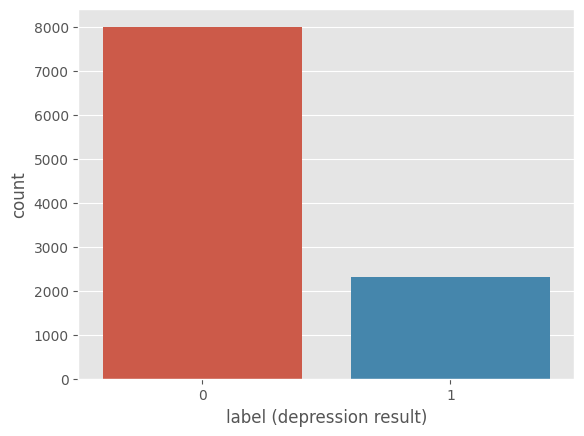

In [58]:
sns.countplot(x='label (depression result)',data = df)
plt.show()

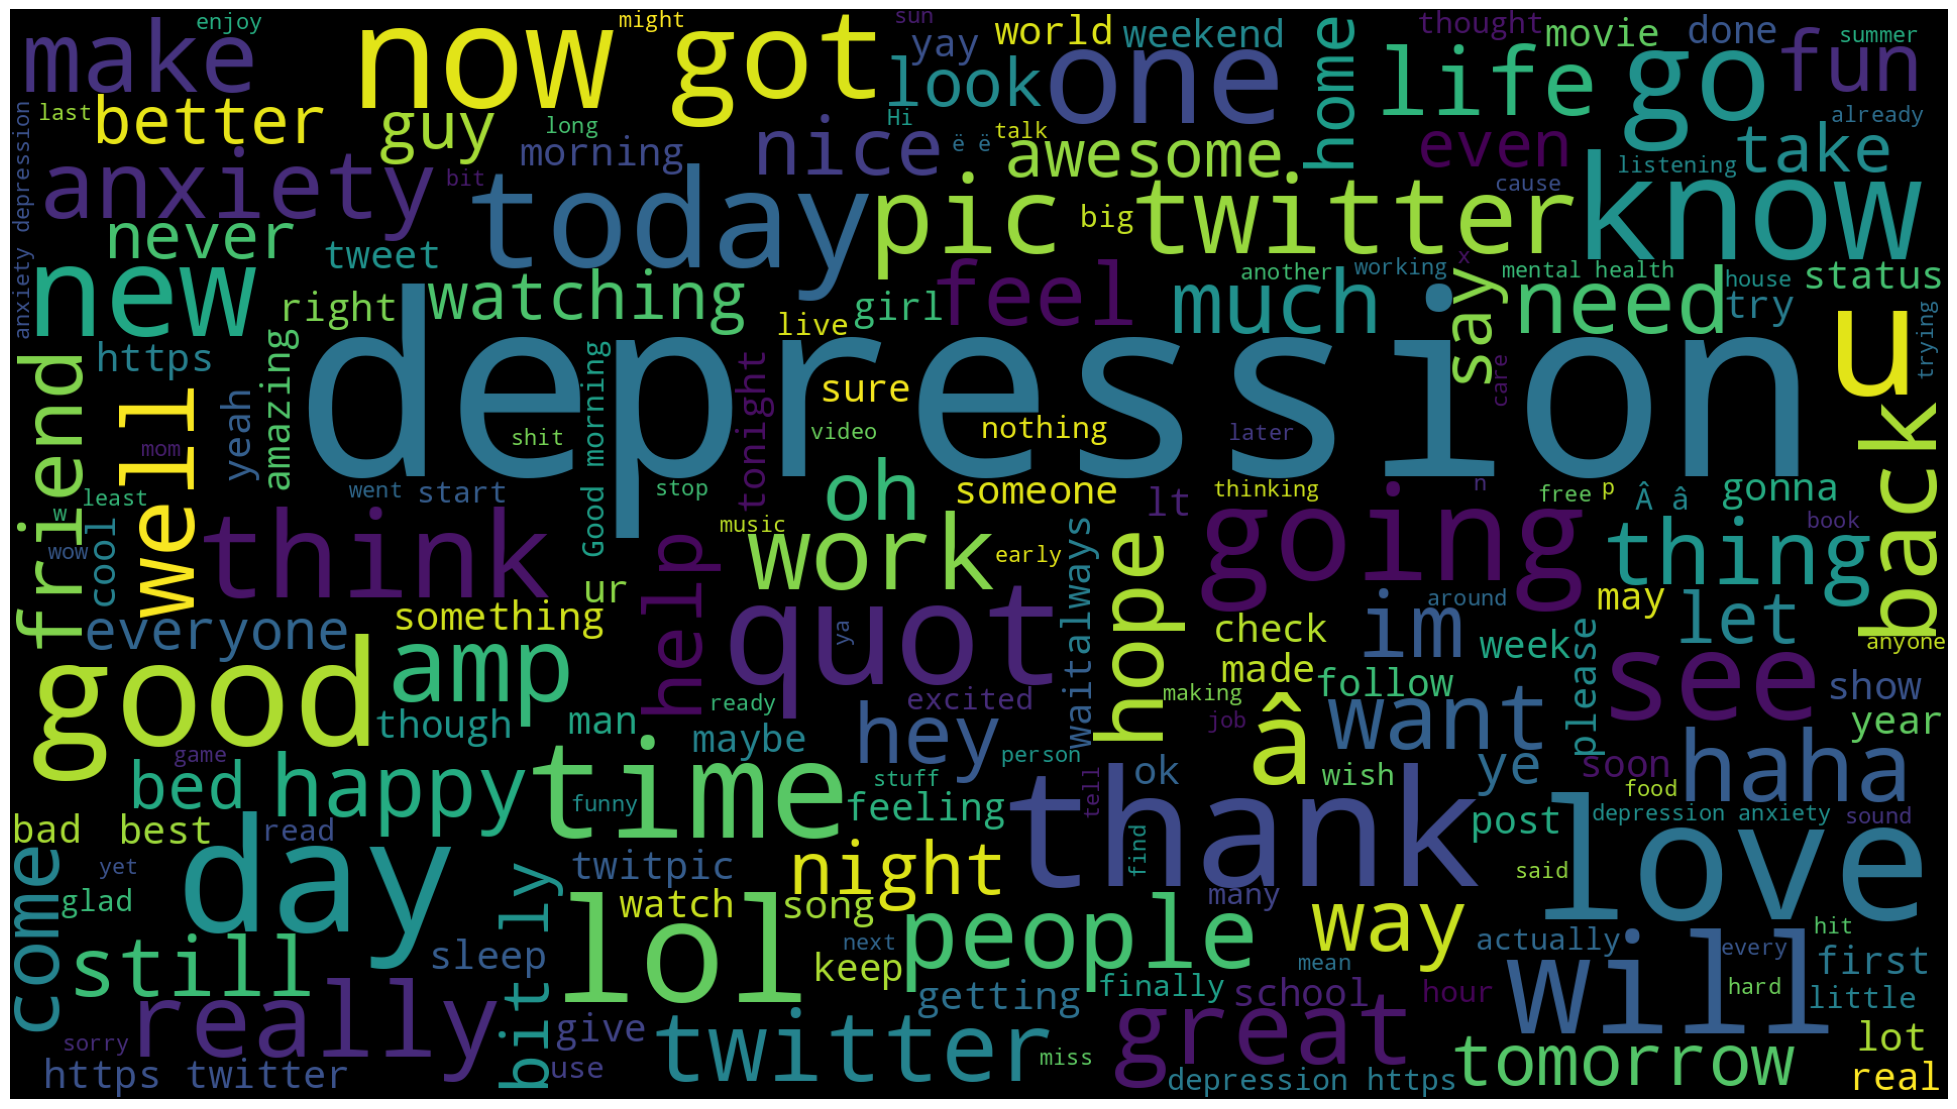

In [59]:
from wordcloud import WordCloud

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='Black',
                      width=1920,
                      height=1080
                     ).generate(" ".join(df['message to examine']))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

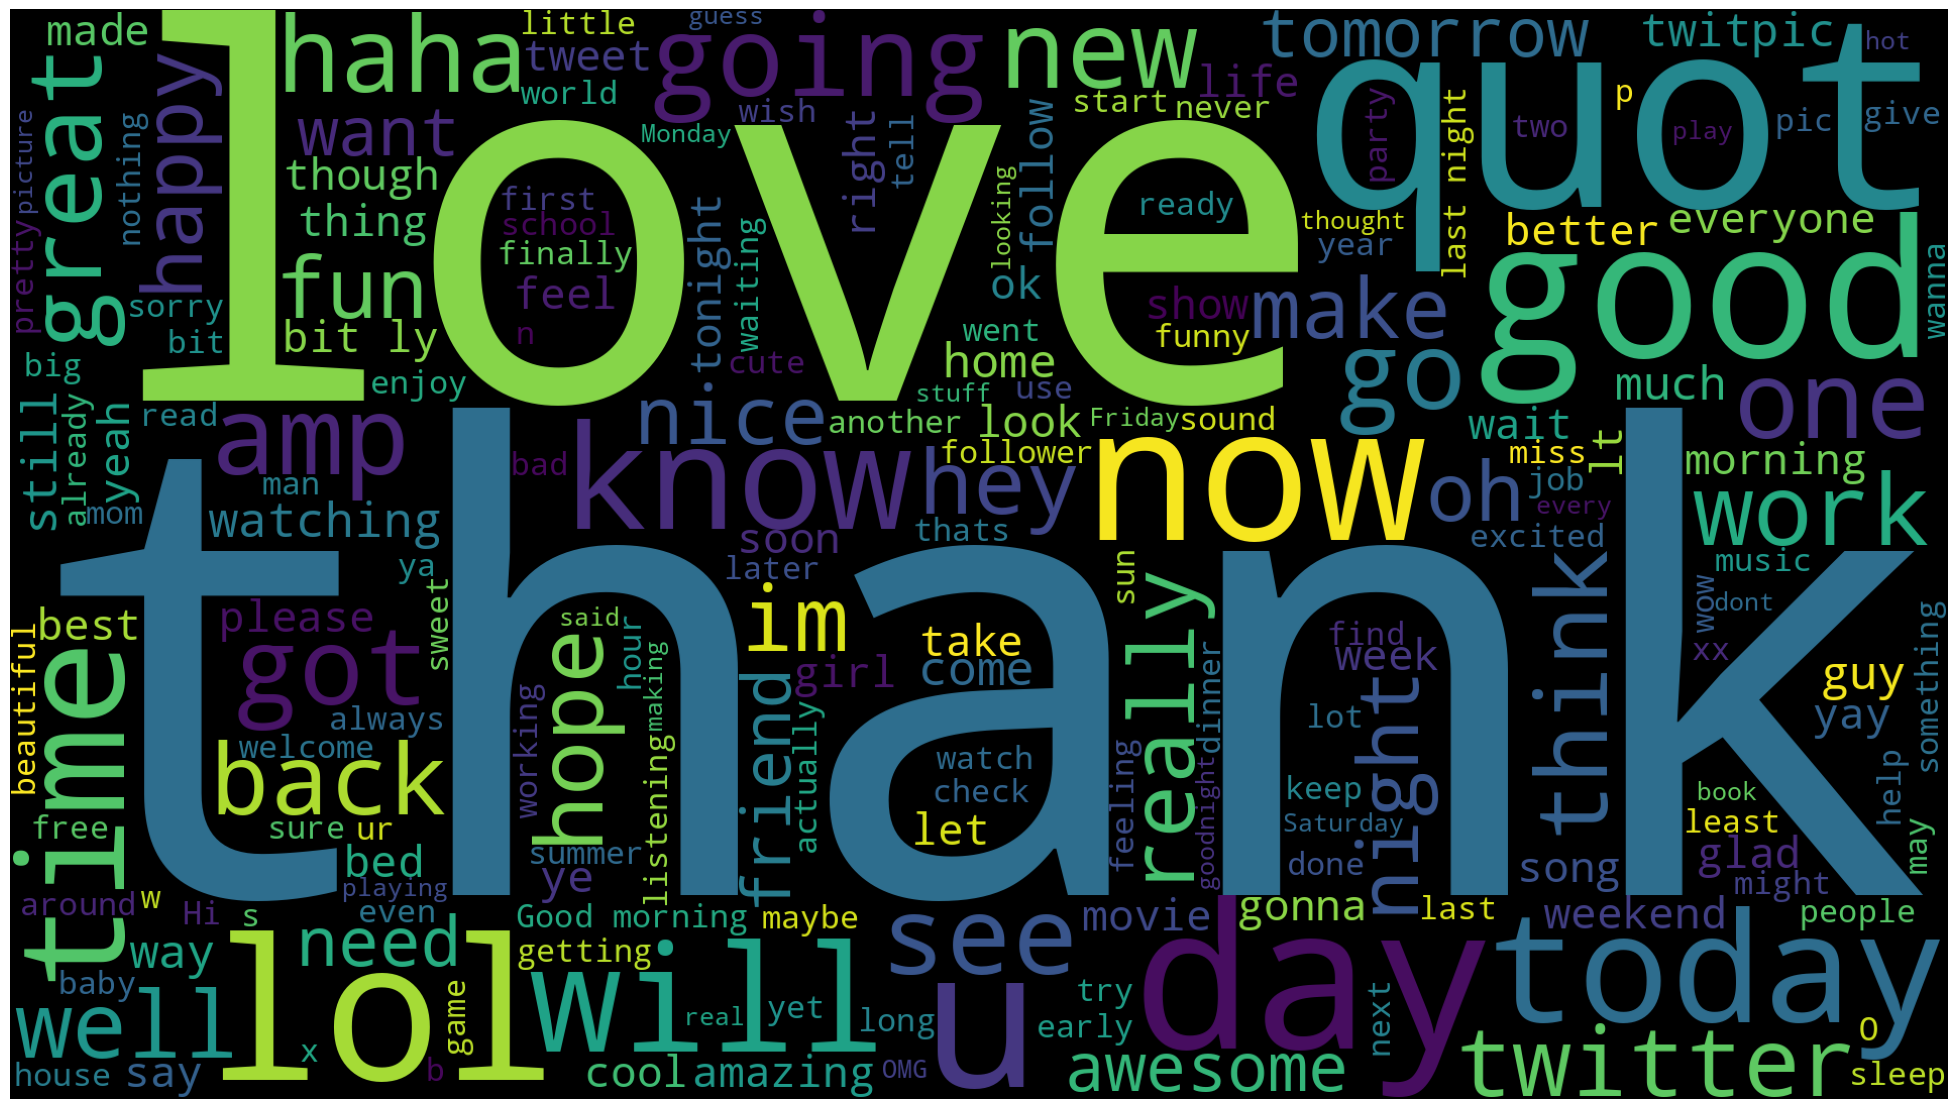

In [60]:
# Non Depression Words

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='Black',
                      width=1920,
                      height=1080
                     ).generate(" ".join(df[df['label (depression result)'] == 0]['message to examine']))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

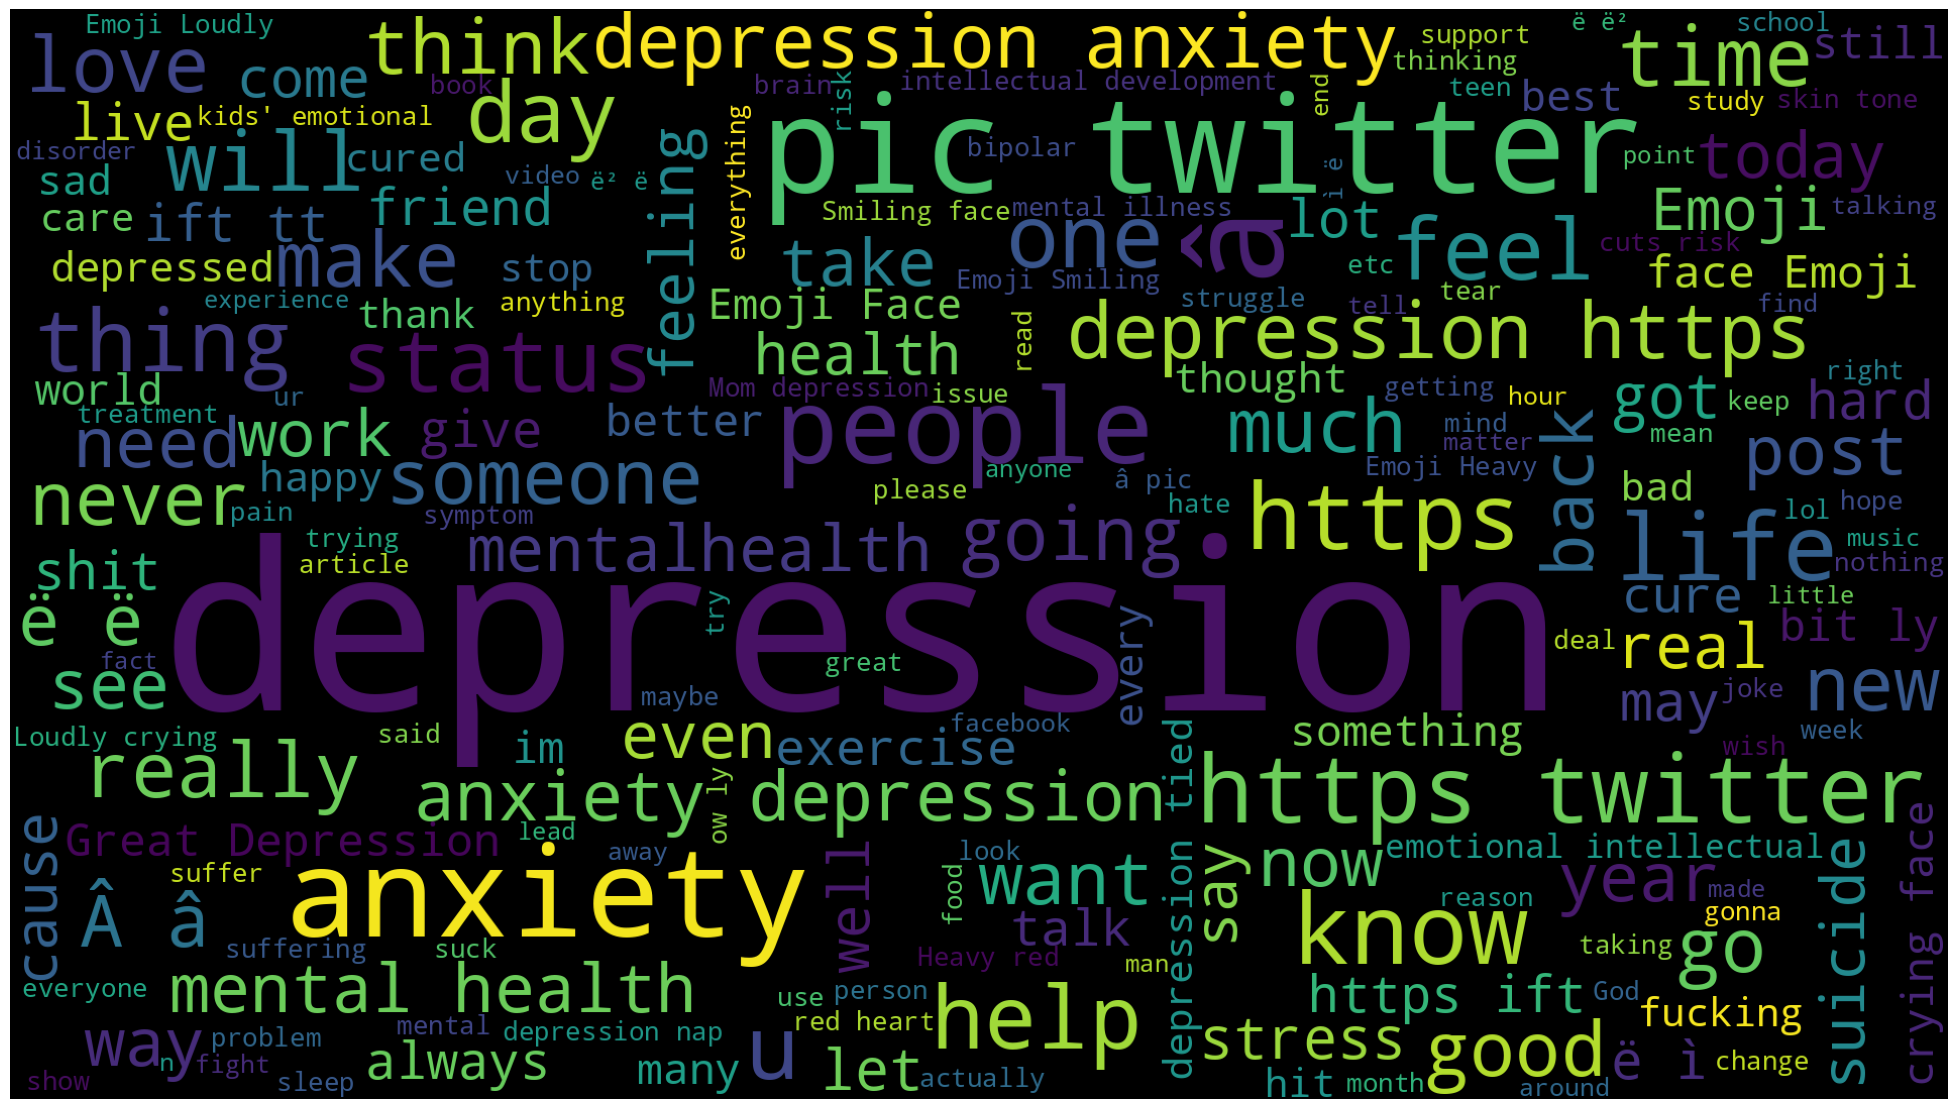

In [61]:
# Depression Words

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='Black',
                      width=1920,
                      height=1080
                     ).generate(" ".join(df[df['label (depression result)'] == 1]['message to examine']))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# **Text Preprocessing**

# **Removing URL’s**

In [62]:
def remove_urls(text):
    # define a regular expression pattern to match URLs
    pattern = r"((https:|http|ftp)?(:\/\/)?(www\.)?)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&\/\/=]*)"

    # replace URLs with an empty string
    cleaned_text = re.sub(pattern, "", text)
    return cleaned_text


df['urlsRemoved'] = df['message to examine'].apply(remove_urls)

df

,Index,message to examine,label (depression result),urlsRemoved
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat Need to send 'em to my accountant tomo...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE!!!
...,...,...,...,...
10308,802308,Many sufferers of depression aren't sad; they ...,1,Many sufferers of depression aren't sad; they ...
10309,802309,No Depression by G Herbo is my mood from now o...,1,No Depression by G Herbo is my mood from now o...
10310,802310,What do you do when depression succumbs the br...,1,What do you do when depression succumbs the br...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,Ketamine Nasal Spray Shows Promise Against Dep...


# **Removing Emoji and Emoticons**

In [63]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                                  u"\U0001F600-\U0001F64F"  # emoticons
                                  u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                  u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                  u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                  u"\U00002702-\U000027B0"  # other miscellaneous symbols
                                  u"\U000024C2-\U0001F251"  # enclosed characters
                                "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)

df['emojiRemoved'] = df['urlsRemoved'].apply(remove_emoji)

df

,Index,message to examine,label (depression result),urlsRemoved,emojiRemoved
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga,is reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -,@comeagainjen -
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat Need to send 'em to my accountant tomo...,@lapcat Need to send 'em to my accountant tomo...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE!!!,ADD ME ON MYSPACE!!!
...,...,...,...,...,...
10308,802308,Many sufferers of depression aren't sad; they ...,1,Many sufferers of depression aren't sad; they ...,Many sufferers of depression aren't sad; they ...
10309,802309,No Depression by G Herbo is my mood from now o...,1,No Depression by G Herbo is my mood from now o...,No Depression by G Herbo is my mood from now o...
10310,802310,What do you do when depression succumbs the br...,1,What do you do when depression succumbs the br...,What do you do when depression succumbs the br...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...


#**Remove Punctiuation and convert text to lower**

In [64]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [65]:
def Remove_punc(text):
    Text_non_punc = "".join([char for char in text if char not in string.punctuation ])
    return Text_non_punc

df['punkt'] = df['emojiRemoved'].apply(lambda x: Remove_punc(x.lower()))

df

,Index,message to examine,label (depression result),urlsRemoved,emojiRemoved,punkt
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss him...
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga,is reading manga,is reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -,@comeagainjen -,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat Need to send 'em to my accountant tomo...,@lapcat Need to send 'em to my accountant tomo...,lapcat need to send em to my accountant tomorr...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE!!!,ADD ME ON MYSPACE!!!,add me on myspace
...,...,...,...,...,...,...
10308,802308,Many sufferers of depression aren't sad; they ...,1,Many sufferers of depression aren't sad; they ...,Many sufferers of depression aren't sad; they ...,many sufferers of depression arent sad they fe...
10309,802309,No Depression by G Herbo is my mood from now o...,1,No Depression by G Herbo is my mood from now o...,No Depression by G Herbo is my mood from now o...,no depression by g herbo is my mood from now o...
10310,802310,What do you do when depression succumbs the br...,1,What do you do when depression succumbs the br...,What do you do when depression succumbs the br...,what do you do when depression succumbs the br...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...,ketamine nasal spray shows promise against dep...


# **Removing Stop Words**

In [66]:
from nltk.corpus import stopwords
set (stopwords.words ('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [67]:
STOPWORDS = set(stopwords.words('english'))

# Function to remove the stopwords
def stopwords(text):
    return " ".join([word for word in text.split() if word not in STOPWORDS])

df['stopWord_Removed'] = df['punkt'].apply(stopwords)

df

,Index,message to examine,label (depression result),urlsRemoved,emojiRemoved,punkt,stopWord_Removed
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss him...,real good moment missssssssss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga,is reading manga,is reading manga,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -,@comeagainjen -,comeagainjen,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat Need to send 'em to my accountant tomo...,@lapcat Need to send 'em to my accountant tomo...,lapcat need to send em to my accountant tomorr...,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE!!!,ADD ME ON MYSPACE!!!,add me on myspace,add myspace
...,...,...,...,...,...,...,...
10308,802308,Many sufferers of depression aren't sad; they ...,1,Many sufferers of depression aren't sad; they ...,Many sufferers of depression aren't sad; they ...,many sufferers of depression arent sad they fe...,many sufferers depression arent sad feel nothi...
10309,802309,No Depression by G Herbo is my mood from now o...,1,No Depression by G Herbo is my mood from now o...,No Depression by G Herbo is my mood from now o...,no depression by g herbo is my mood from now o...,depression g herbo mood im done stressing peop...
10310,802310,What do you do when depression succumbs the br...,1,What do you do when depression succumbs the br...,What do you do when depression succumbs the br...,what do you do when depression succumbs the br...,depression succumbs brain makes feel like youl...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise depression ...


# **Stemming**

In [68]:
stemmer = PorterStemmer()

def stemRows(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df['stemmedRows'] = df['stopWord_Removed'].apply(stemRows)

df

,Index,message to examine,label (depression result),urlsRemoved,emojiRemoved,punkt,stopWord_Removed,stemmedRows
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss him...,real good moment missssssssss much,real good moment missssssssss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga,is reading manga,is reading manga,reading manga,read manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -,@comeagainjen -,comeagainjen,comeagainjen,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat Need to send 'em to my accountant tomo...,@lapcat Need to send 'em to my accountant tomo...,lapcat need to send em to my accountant tomorr...,lapcat need send em accountant tomorrow oddly ...,lapcat need send em account tomorrow oddli was...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE!!!,ADD ME ON MYSPACE!!!,add me on myspace,add myspace,add myspac
...,...,...,...,...,...,...,...,...
10308,802308,Many sufferers of depression aren't sad; they ...,1,Many sufferers of depression aren't sad; they ...,Many sufferers of depression aren't sad; they ...,many sufferers of depression arent sad they fe...,many sufferers depression arent sad feel nothi...,mani suffer depress arent sad feel noth persis...
10309,802309,No Depression by G Herbo is my mood from now o...,1,No Depression by G Herbo is my mood from now o...,No Depression by G Herbo is my mood from now o...,no depression by g herbo is my mood from now o...,depression g herbo mood im done stressing peop...,depress g herbo mood im done stress peopl dont...
10310,802310,What do you do when depression succumbs the br...,1,What do you do when depression succumbs the br...,What do you do when depression succumbs the br...,what do you do when depression succumbs the br...,depression succumbs brain makes feel like youl...,depress succumb brain make feel like youll nev...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise depression ...,ketamin nasal spray show promis depress suicid...


# **Lemmatization**

In [69]:
lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()

def lemmatizeRows(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df['lemmatizedRows'] = df['stemmedRows'].apply(lemmatizeRows)

df

,Index,message to examine,label (depression result),urlsRemoved,emojiRemoved,punkt,stopWord_Removed,stemmedRows,lemmatizedRows
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss him...,real good moment missssssssss much,real good moment missssssssss much,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga,is reading manga,is reading manga,reading manga,read manga,read manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -,@comeagainjen -,comeagainjen,comeagainjen,comeagainjen,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat Need to send 'em to my accountant tomo...,@lapcat Need to send 'em to my accountant tomo...,lapcat need to send em to my accountant tomorr...,lapcat need send em accountant tomorrow oddly ...,lapcat need send em account tomorrow oddli was...,lapcat need send em account tomorrow oddli was...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE!!!,ADD ME ON MYSPACE!!!,add me on myspace,add myspace,add myspac,add myspac
...,...,...,...,...,...,...,...,...,...
10308,802308,Many sufferers of depression aren't sad; they ...,1,Many sufferers of depression aren't sad; they ...,Many sufferers of depression aren't sad; they ...,many sufferers of depression arent sad they fe...,many sufferers depression arent sad feel nothi...,mani suffer depress arent sad feel noth persis...,mani suffer depress arent sad feel noth persis...
10309,802309,No Depression by G Herbo is my mood from now o...,1,No Depression by G Herbo is my mood from now o...,No Depression by G Herbo is my mood from now o...,no depression by g herbo is my mood from now o...,depression g herbo mood im done stressing peop...,depress g herbo mood im done stress peopl dont...,depress g herbo mood im done stress peopl dont...
10310,802310,What do you do when depression succumbs the br...,1,What do you do when depression succumbs the br...,What do you do when depression succumbs the br...,what do you do when depression succumbs the br...,depression succumbs brain makes feel like youl...,depress succumb brain make feel like youll nev...,depress succumb brain make feel like youll nev...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise depression ...,ketamin nasal spray show promis depress suicid...,ketamin nasal spray show promis depress suicid...


# **Tokens Cleaning**

In [70]:
def cleanData(text):

    ReapeatTokensRm =  " ".join( [ re.sub(r'(\w)\1{2,}', r'\1', word) for word in text.split()] )  # Remove repeating characters from tokens

    digitTokensRm =  " ".join( [ word for word in ReapeatTokensRm.split() if not re.search(r'\d', word) ] ) # Remove tokens containing digits

    underscoreTokensRm =  " ".join( [ word for word in digitTokensRm.split() if not re.search(r'_|\w*_\w*', word) ] ) # Remove tokens containing underscore

    specialTokensRm =  " ".join( [ word for word in underscoreTokensRm.split() if not re.search(r'[^a-zA-Z0-9\s]', word) ] ) # Remove tokens containing Special Characters

    return " ".join( [ word for word in specialTokensRm.split() if len(word) > 2 ] )  # Remove tokens less than 2 characters


df['cleanTokens'] = df['lemmatizedRows'].apply(cleanData)

df

,Index,message to examine,label (depression result),urlsRemoved,emojiRemoved,punkt,stopWord_Removed,stemmedRows,lemmatizedRows,cleanTokens
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss him...,real good moment missssssssss much,real good moment missssssssss much,real good moment miss much,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga,is reading manga,is reading manga,reading manga,read manga,read manga,read manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -,@comeagainjen -,comeagainjen,comeagainjen,comeagainjen,comeagainjen,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat Need to send 'em to my accountant tomo...,@lapcat Need to send 'em to my accountant tomo...,lapcat need to send em to my accountant tomorr...,lapcat need send em accountant tomorrow oddly ...,lapcat need send em account tomorrow oddli was...,lapcat need send em account tomorrow oddli was...,lapcat need send account tomorrow oddli wasnt ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE!!!,ADD ME ON MYSPACE!!!,add me on myspace,add myspace,add myspac,add myspac,add myspac
...,...,...,...,...,...,...,...,...,...,...
10308,802308,Many sufferers of depression aren't sad; they ...,1,Many sufferers of depression aren't sad; they ...,Many sufferers of depression aren't sad; they ...,many sufferers of depression arent sad they fe...,many sufferers depression arent sad feel nothi...,mani suffer depress arent sad feel noth persis...,mani suffer depress arent sad feel noth persis...,mani suffer depress arent sad feel noth persis...
10309,802309,No Depression by G Herbo is my mood from now o...,1,No Depression by G Herbo is my mood from now o...,No Depression by G Herbo is my mood from now o...,no depression by g herbo is my mood from now o...,depression g herbo mood im done stressing peop...,depress g herbo mood im done stress peopl dont...,depress g herbo mood im done stress peopl dont...,depress herbo mood done stress peopl dont deserv
10310,802310,What do you do when depression succumbs the br...,1,What do you do when depression succumbs the br...,What do you do when depression succumbs the br...,what do you do when depression succumbs the br...,depression succumbs brain makes feel like youl...,depress succumb brain make feel like youll nev...,depress succumb brain make feel like youll nev...,depress succumb brain make feel like youll nev...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise depression ...,ketamin nasal spray show promis depress suicid...,ketamin nasal spray show promis depress suicid...,ketamin nasal spray show promis depress suicid...


# **TF-IDF Vectorization**

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

Vectorizer = TfidfVectorizer()

dataVectorized = Vectorizer.fit_transform(df['cleanTokens'])

feature_names = Vectorizer.get_feature_names_out()

pd.DataFrame(dataVectorized.toarray(), columns = feature_names)

,aacerr,aacura,aah,aahahaa,aahh,aahhaha,aampb,aampd,aapoc,aaron,...,zombien,zombilici,zomg,zone,zoo,zoot,zooyork,zpush,ztnewetnorb,zumba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
dataVectorized.toarray().shape

(10313, 16032)

In [73]:
feature_names[:1000]

array(['aacerr', 'aacura', 'aah', 'aahahaa', 'aahh', 'aahhaha', 'aampb',
       'aampd', 'aapoc', 'aaron', 'aaronmcarrol', 'aasrikayi', 'abandon',
       'abat', 'abatevintag', 'abbrevi', 'abbynorm', 'abbyrosia', 'abc',
       'abdulla', 'abduzeedo', 'abe', 'abeautyhealthi', 'abecryst',
       'abeerak', 'abel', 'abhijith', 'abhor', 'abi', 'abil', 'abit',
       'abl', 'abnorm', 'aboard', 'abokssignatur', 'abort', 'aboslut',
       'abound', 'aboutl', 'abraham', 'abroad', 'absenc', 'absent',
       'absinth', 'absolout', 'absolut', 'absolutli', 'absorb', 'abt',
       'abu', 'abund', 'abus', 'academ', 'academi', 'acc', 'accent',
       'accept', 'acceptanceim', 'access', 'accessori', 'accid',
       'accident', 'accommod', 'accompani', 'accomplish', 'accord',
       'accordingli', 'account', 'accout', 'acct', 'acctng', 'accur',
       'accus', 'acdc', 'ace', 'aceconcierg', 'aceppt', 'aceybongo',
       'ach', 'achiev', 'achiv', 'achja', 'acho', 'acidicic', 'acim',
       'acn', 'acoust

# **Splitting Data**

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train ,y_test = train_test_split(dataVectorized, df['label (depression result)'], test_size=0.2,
                                                    stratify= df['label (depression result)']  , random_state=0)

In [75]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8250, 16032), (8250,), (2063, 16032), (2063,))

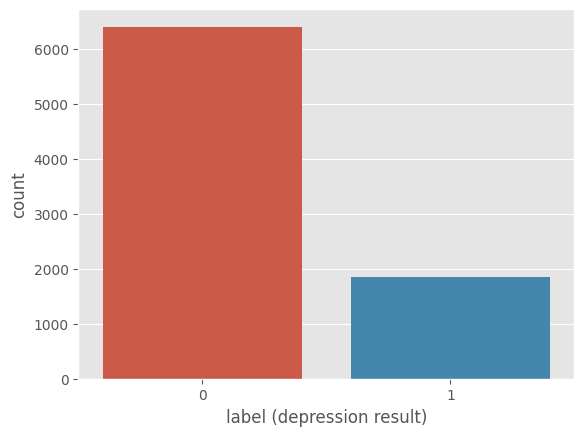

In [76]:
sns.countplot(x=y_train)
plt.show()

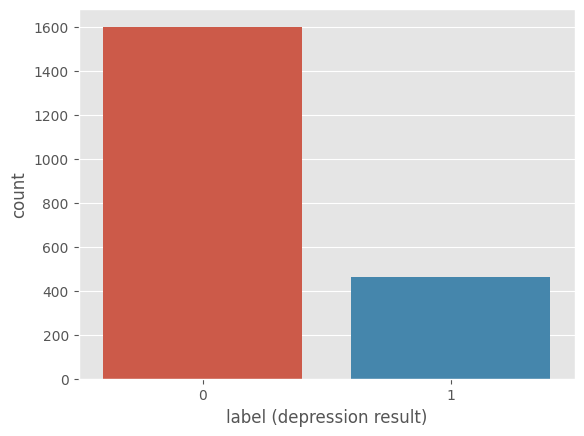

In [77]:
sns.countplot(x=y_test)
plt.show()

In [78]:
#we can force as estimator to learn based on more or less importance (‘weight’) given to a particular class.
#Weights scale the loss function. As the model trains on each point, the error will be multiplied by the weight of the point. The estimator will try to minimize error on the more heavily weighted classes, because they will have a greater effect on error, sending a stronger signal. Without weights set, the model treats each point as equally important.
from sklearn.utils import compute_class_weight

classWeights = compute_class_weight("balanced", classes = np.unique(df['label (depression result)']),
                                     y = df['label (depression result)'])

classWeights = dict(zip(np.unique(np.unique(df['label (depression result)'])), classWeights))

print(classWeights)

{0: 0.6445625, 1: 2.229355814958928}


# **Fitting Models**

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [80]:
lr = LogisticRegression(class_weight=classWeights, random_state=0)

nb = MultinomialNB()

dt = DecisionTreeClassifier(class_weight=classWeights, random_state=0)

rf = RandomForestClassifier(class_weight=classWeights, random_state=0)

svc = LinearSVC(class_weight=classWeights, random_state=0)

In [81]:
lr.fit(X_train.toarray(), y_train)

nb.fit(X_train.toarray(), y_train)

dt.fit(X_train.toarray(), y_train)

rf.fit(X_train.toarray(), y_train)

svc.fit(X_train.toarray(), y_train)

LinearSVC(class_weight={0: 0.6445625, 1: 2.229355814958928}, random_state=0)

In [83]:
lrScore = lr.score(X_train.toarray(), y_train)

nbScore = nb.score(X_train.toarray(), y_train)

dtScore = dt.score(X_train.toarray(), y_train)

rfScore = rf.score(X_train.toarray(), y_train)

svcScore = svc.score(X_train.toarray(), y_train)

In [84]:
colors = plt.cm.viridis(np.linspace(0, 1, 5))

models = ["Logistic Regression","Naive Bayes","Decision Trees", "Random Forests", "Support Vector"]

Logistic Regression Train Accuracy score is : 99.31%

Naive Bayes Train Accuracy score is : 93.83%

Decision Tree Train Accuracy score is : 99.88%

Random Forest Train Accuracy score is : 99.88%

Support Vector Train Accuracy score is : 99.95%


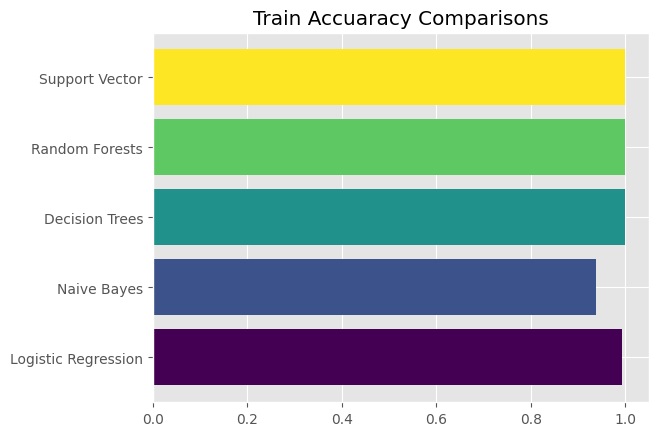

In [85]:
plt.barh(models, width = [lrScore, nbScore, dtScore, rfScore, svcScore],
        color = colors)

plt.title("Train Accuaracy Comparisons")

print(f'Logistic Regression Train Accuracy score is : {round(lrScore * 100 ,2)}%')

print(f'\nNaive Bayes Train Accuracy score is : {round(nbScore * 100 , 2)}%')

print(f'\nDecision Tree Train Accuracy score is : {round(dtScore * 100 , 2)}%')

print(f'\nRandom Forest Train Accuracy score is : {round(rfScore * 100 , 2)}%')

print(f'\nSupport Vector Train Accuracy score is : {round(svcScore * 100 , 2)}%')

In [86]:
lrScore = lr.score(X_test.toarray(), y_test)

nbScore = nb.score(X_test.toarray(), y_test)

dtScore = dt.score(X_test.toarray(), y_test)

rfScore = rf.score(X_test.toarray(), y_test)

svcScore = svc.score(X_test.toarray(), y_test)

Logistic Regression Test Accuracy score is : 98.89%

Naive Bayes Test Accuracy score is : 91.47%

Decision Tree Test Accuracy score is : 93.26%

Random Forest Test Accuracy score is : 96.41%

Support Vector Test Accuracy score is : 99.03%


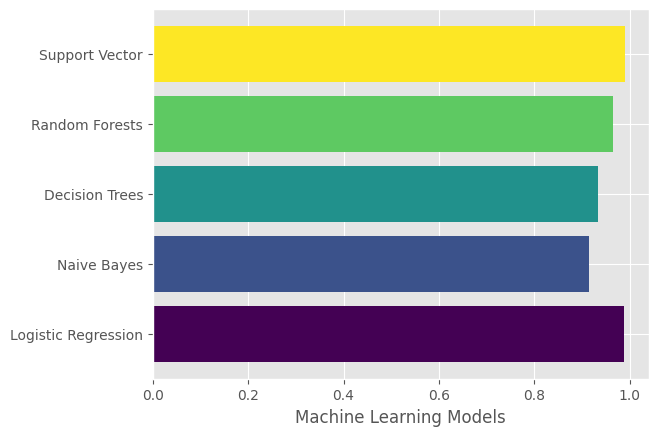

In [87]:
plt.barh(models, width = [lrScore, nbScore, dtScore, rfScore, svcScore],
        color = colors)

plt.xlabel("Machine Learning Models")


print(f'Logistic Regression Test Accuracy score is : {round(lrScore * 100 ,2)}%')

print(f'\nNaive Bayes Test Accuracy score is : {round(nbScore * 100 , 2)}%')

print(f'\nDecision Tree Test Accuracy score is : {round(dtScore * 100 , 2)}%')

print(f'\nRandom Forest Test Accuracy score is : {round(rfScore * 100 , 2)}%')

print(f'\nSupport Vector Test Accuracy score is : {round(svcScore * 100 , 2)}%')

# **Evaluating Models**

In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

In [89]:
lrPreds = lr.predict(X_test.toarray())

nbPreds = nb.predict(X_test.toarray())

dtPreds = dt.predict(X_test.toarray())

rfPreds = rf.predict(X_test.toarray())

svcPreds = svc.predict(X_test.toarray())

In [92]:
lrScore = roc_auc_score(lrPreds, y_test)

nbScore = roc_auc_score(nbPreds, y_test)

dtScore = roc_auc_score(dtPreds, y_test)

rfScore = roc_auc_score(rfPreds, y_test)

svcScore = roc_auc_score(svcPreds, y_test)

Logistic Regression Test Roc Auc Score is : 99.29%

Naive Bayes Test Roc Auc Score is : 94.32%

Decision Tree Test Roc Auc Score is : 88.64%

Random Forest Test Roc Auc Score is : 93.74%

Support Vector Test Roc Auc Score is : 99.38%


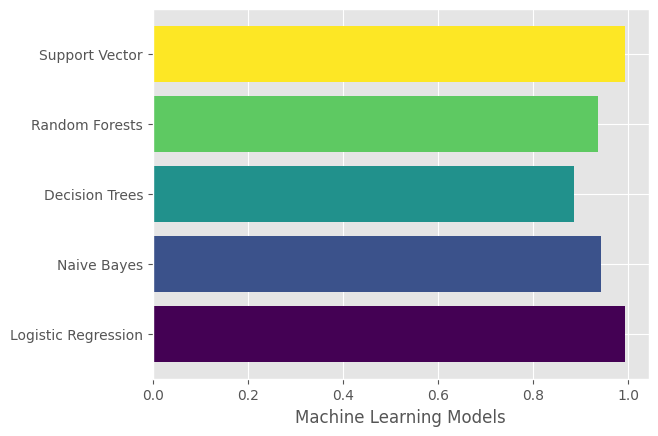

In [93]:
plt.barh(models, width = [lrScore, nbScore, dtScore, rfScore, svcScore],
        color = colors)

plt.xlabel("Machine Learning Models")


print(f'Logistic Regression Test Roc Auc Score is : {round(lrScore * 100 ,2)}%')

print(f'\nNaive Bayes Test Roc Auc Score is : {round(nbScore * 100 , 2)}%')

print(f'\nDecision Tree Test Roc Auc Score is : {round(dtScore * 100 , 2)}%')

print(f'\nRandom Forest Test Roc Auc Score is : {round(rfScore * 100 , 2)}%')

print(f'\nSupport Vector Test Roc Auc Score is : {round(svcScore * 100 , 2)}%')

In [94]:
def makeCM_Matrix(cm_matrix, title):

  categories = ['Negative','Positive']

  group_names = ['True Negative','False Positive', 'False Negative','True Positive']

  group_percentages = ['{0:.2%}'.format(value) for value in cm_matrix.flatten() / np.sum(cm_matrix)]

  labels = [f'{v1}\n{v2} ({v3})' for v1, v2 ,v3 in zip(group_names,cm_matrix.flatten(),group_percentages)]

  labels = np.asarray(labels).reshape(2,2)

  sns.heatmap(cm_matrix, annot = labels,fmt = '',
  xticklabels = categories, yticklabels = categories)

  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title (f"{title} Confusion Matrix", fontdict = {'size':18}, pad = 20)
  plt.show()

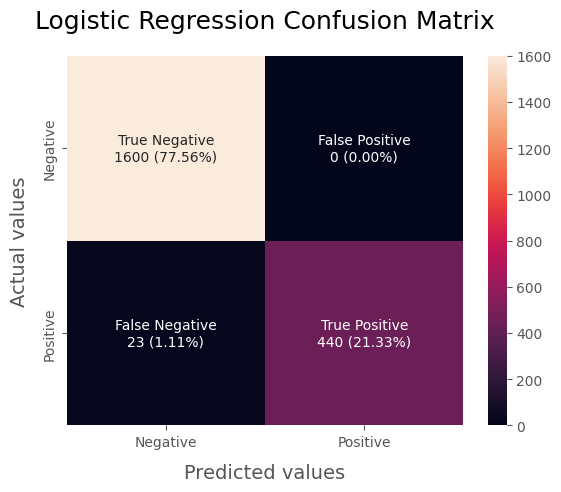

In [95]:
makeCM_Matrix(confusion_matrix(y_test, lrPreds), 'Logistic Regression')

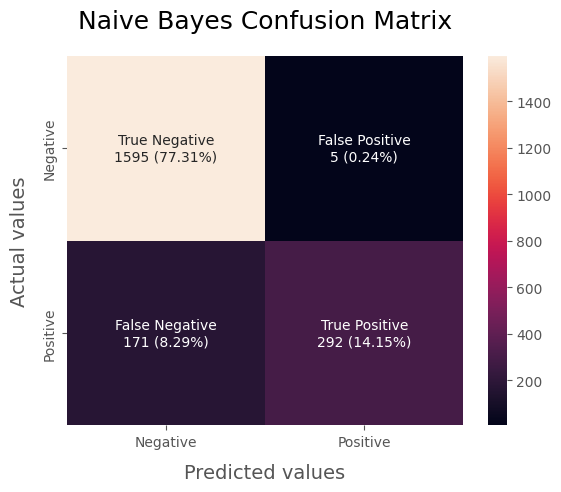

In [96]:
makeCM_Matrix(confusion_matrix(y_test, nbPreds), 'Naive Bayes')

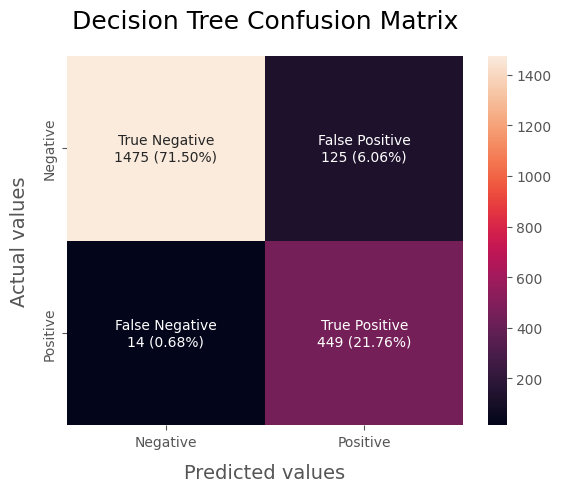

In [97]:
makeCM_Matrix(confusion_matrix(y_test, dtPreds), 'Decision Tree')

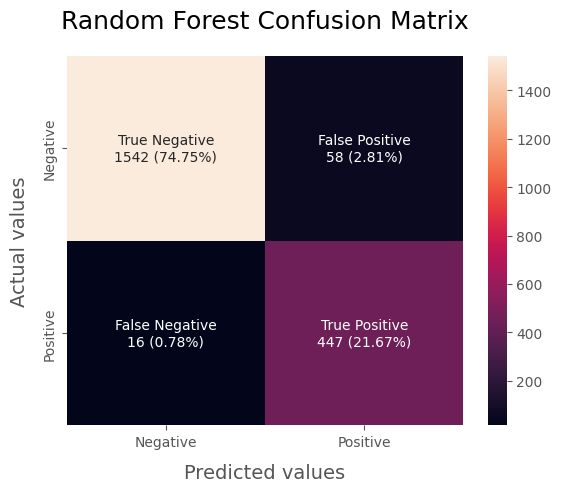

In [98]:
makeCM_Matrix(confusion_matrix(y_test, rfPreds), 'Random Forest')

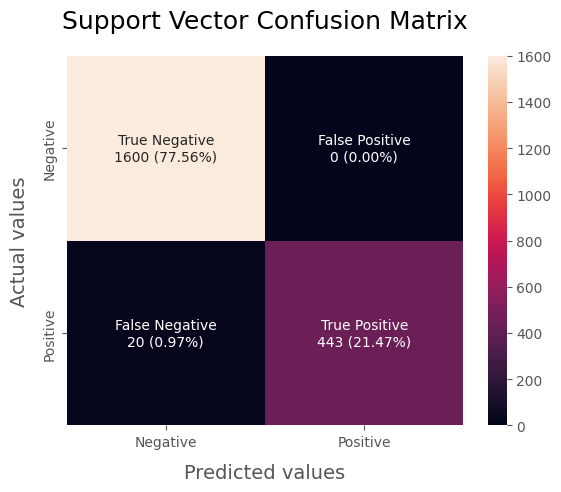

In [99]:
makeCM_Matrix(confusion_matrix(y_test, svcPreds), 'Support Vector')

In [100]:
from sklearn.metrics import classification_report

classification_report = classification_report(y_test, lrPreds, target_names=['No','Yes'])
print('Logistic Regression Classification Report: \n',classification_report)

Logistic Regression Classification Report: 
               precision    recall  f1-score   support

          No       0.99      1.00      0.99      1600
         Yes       1.00      0.95      0.97       463

    accuracy                           0.99      2063
   macro avg       0.99      0.98      0.98      2063
weighted avg       0.99      0.99      0.99      2063



In [101]:
from sklearn.metrics import classification_report

classification_report = classification_report(y_test, nbPreds, target_names=['No','Yes'])
print('Naive Bayes Classification Report: \n', classification_report)

Naive Bayes Classification Report: 
               precision    recall  f1-score   support

          No       0.90      1.00      0.95      1600
         Yes       0.98      0.63      0.77       463

    accuracy                           0.91      2063
   macro avg       0.94      0.81      0.86      2063
weighted avg       0.92      0.91      0.91      2063



In [102]:
from sklearn.metrics import classification_report

classification_report = classification_report(y_test, dtPreds, target_names=['No','Yes'])
print('Decision Tree Classification Report: \n',classification_report)

Decision Tree Classification Report: 
               precision    recall  f1-score   support

          No       0.99      0.92      0.96      1600
         Yes       0.78      0.97      0.87       463

    accuracy                           0.93      2063
   macro avg       0.89      0.95      0.91      2063
weighted avg       0.94      0.93      0.94      2063



In [103]:
from sklearn.metrics import classification_report

classification_report = classification_report(y_test, rfPreds, target_names=['No','Yes'])
print('Random Forest Classification Report: \n',classification_report)

Random Forest Classification Report: 
               precision    recall  f1-score   support

          No       0.99      0.96      0.98      1600
         Yes       0.89      0.97      0.92       463

    accuracy                           0.96      2063
   macro avg       0.94      0.96      0.95      2063
weighted avg       0.97      0.96      0.96      2063



In [104]:
from sklearn.metrics import classification_report

classification_report = classification_report(y_test, svcPreds, target_names=['No','Yes'])
print('Support Vector Classification Report: \n',classification_report)

Support Vector Classification Report: 
               precision    recall  f1-score   support

          No       0.99      1.00      0.99      1600
         Yes       1.00      0.96      0.98       463

    accuracy                           0.99      2063
   macro avg       0.99      0.98      0.99      2063
weighted avg       0.99      0.99      0.99      2063

